# Network Clustering

## Introduction

You've now looked at some basic measures of nodes and their relationships to one another. Expanding upon this analysis of networks, it is natural to focus on larger structures within the network. In this lesson you'll explore clusters within networks such as subcultures, social circles, and cliques. 

## Objectives

You will be able to:

- Define clique in the context of clustering with graphs 
- Implement k-clique and Girvan-Newman clustering via networkx 

## Approaches to Clustering

You've already started to get a vague sense of clustering: in the previous lab, you attempted to find individuals who bridged two different social circles within a larger network. These key individuals who connect the network are the glue that holds the network together. From this, there are two ways to approach clustering groups and subgroups in networks: one is from the bottom up, building smaller networks from central nodes on out, and the other from the top down, removing central nodes from the full network and observing how the network splinters into factions.  

One method exhibiting the former approach to clustering is k-clique clustering. A clique is a subset of nodes which are adjacent to all the other nodes within the clique. The most simple example is with three nodes:

<img src="images/graph_cliques.png" width=650>

K-clique clustering expands upon this notion of cliques by forming clusters of nodes that are within $k$ edges from one another. As with the simple cliques shown above, all nodes within these clique clusters must be within $k$ edges from any other node within the clique. 

The Girvan–Newman algorithm takes the opposite approach. It starts with the full network and then begins removing nodes with the largest betweenness, observing how the graph then breaks into smaller clusters. Due to this approach, the graph will gradually be broken into smaller and smaller clusters until every node forms it's own cluster. As a result, determining an appropriate threshold to terminate the algorithm where groups are well formed and neither too general nor too specific can be a challenge.

## Implementing Clustering with NetworkX

### K-Clique Clustering in NetworkX

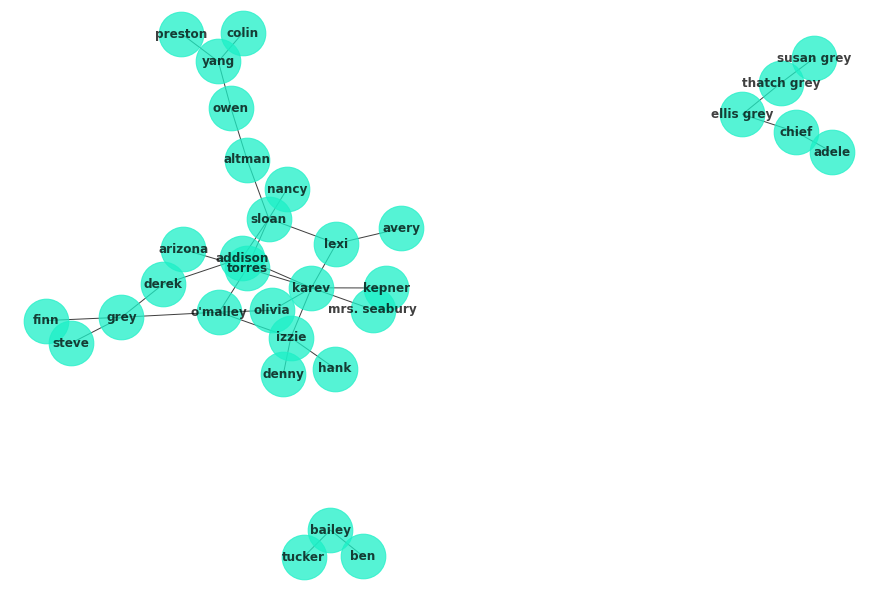

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.read_gexf('ga_graph.gexf')
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, node_color='#1cf0c7',
        alpha=.75, font_weight='bold', node_size=2*10**3, pos=nx.spring_layout(G, seed=4))

In [2]:
c = list(nx.algorithms.community.k_clique_communities(G, k=2))
c

[frozenset({'addison',
            'altman',
            'arizona',
            'avery',
            'colin',
            'denny',
            'derek',
            'finn',
            'grey',
            'hank',
            'izzie',
            'karev',
            'kepner',
            'lexi',
            'mrs. seabury',
            'nancy',
            "o'malley",
            'olivia',
            'owen',
            'preston',
            'sloan',
            'steve',
            'torres',
            'yang'}),
 frozenset({'bailey', 'ben', 'tucker'}),
 frozenset({'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'})]

In [3]:
colors = [('teal', '#1cf0c7'),
         ( 'workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('slate', '#2b2b2b'),
         ('dark-blue', '#144ff')]
color_dict = dict(colors)

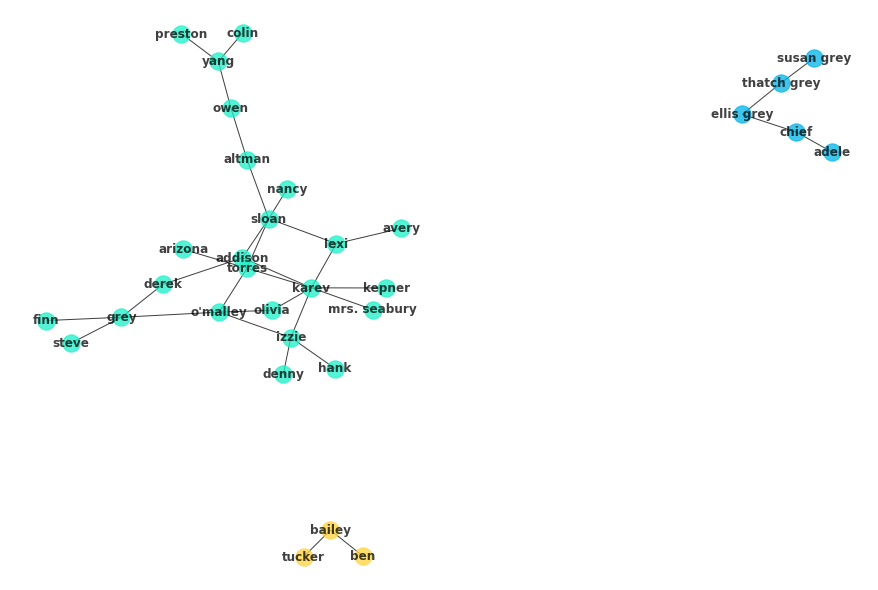

In [4]:
fig = plt.figure(figsize=(12,8))
for n, ci in enumerate(c):
    ci = G.subgraph(ci)
    nx.draw(ci, with_labels=True, node_color=colors[n][1],
            alpha=.75, font_weight='bold', pos=nx.spring_layout(G, seed=4))

## The Girvan Newman Algorithm in NetworkX

As discussed, the Girvan Newman algorithm works by successively removing edges which are considered to be strong ties between subsets in the community. Typically, this is the betweenness metric. Since you are removing edges in the algorithm, betweenness is calculated for the edges as opposed to the nodes, as you have previously seen. The process is nearly identical though. First, the shortest paths between all nodes are computed using Dijkstra's algorithm. From there, an edges betweenness is the fraction of these paths that the edge is part of.

Implementing the algorithm with NetworkX is straightforward. See the documentation for passing alternative metrics then betweenness through the algorithm.

In [5]:
c_gn = list(nx.algorithms.community.centrality.girvan_newman(G))
print(len(c_gn), c_gn[:3])

29 [({'derek', 'nancy', 'finn', 'sloan', 'lexi', 'arizona', 'karev', 'kepner', 'olivia', "o'malley", 'avery', 'grey', 'izzie', 'addison', 'steve', 'mrs. seabury', 'torres', 'hank', 'denny'}, {'ellis grey', 'chief', 'adele', 'thatch grey', 'susan grey'}, {'tucker', 'bailey', 'ben'}, {'owen', 'colin', 'yang', 'preston', 'altman'}), ({"o'malley", 'sloan', 'lexi', 'nancy', 'avery', 'izzie', 'addison', 'denny', 'arizona', 'mrs. seabury', 'karev', 'kepner', 'torres', 'hank', 'olivia'}, {'ellis grey', 'chief', 'adele', 'thatch grey', 'susan grey'}, {'tucker', 'bailey', 'ben'}, {'grey', 'finn', 'derek', 'steve'}, {'owen', 'colin', 'yang', 'preston', 'altman'}), ({"o'malley", 'sloan', 'lexi', 'nancy', 'avery', 'addison', 'arizona', 'mrs. seabury', 'karev', 'kepner', 'torres', 'olivia'}, {'ellis grey', 'chief', 'adele', 'thatch grey', 'susan grey'}, {'izzie', 'hank', 'denny'}, {'tucker', 'bailey', 'ben'}, {'grey', 'finn', 'derek', 'steve'}, {'owen', 'colin', 'yang', 'preston', 'altman'})]


> Comment: Note how there is a large number of results! Each is a list of clusters formed by removing the `n` strongest edges according to the metric specified.

In [6]:
c_gn[0]

({'addison',
  'arizona',
  'avery',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'sloan',
  'steve',
  'torres'},
 {'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'},
 {'bailey', 'ben', 'tucker'},
 {'altman', 'colin', 'owen', 'preston', 'yang'})

In [7]:
colors = [('teal', '#1cf0c7'),
         ( 'workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('slate', '#2b2b2b'),
         ('dark-blue', '#1443ff')]

Since there are so many individual clusters, take a look at the first four results of removing successive edges:

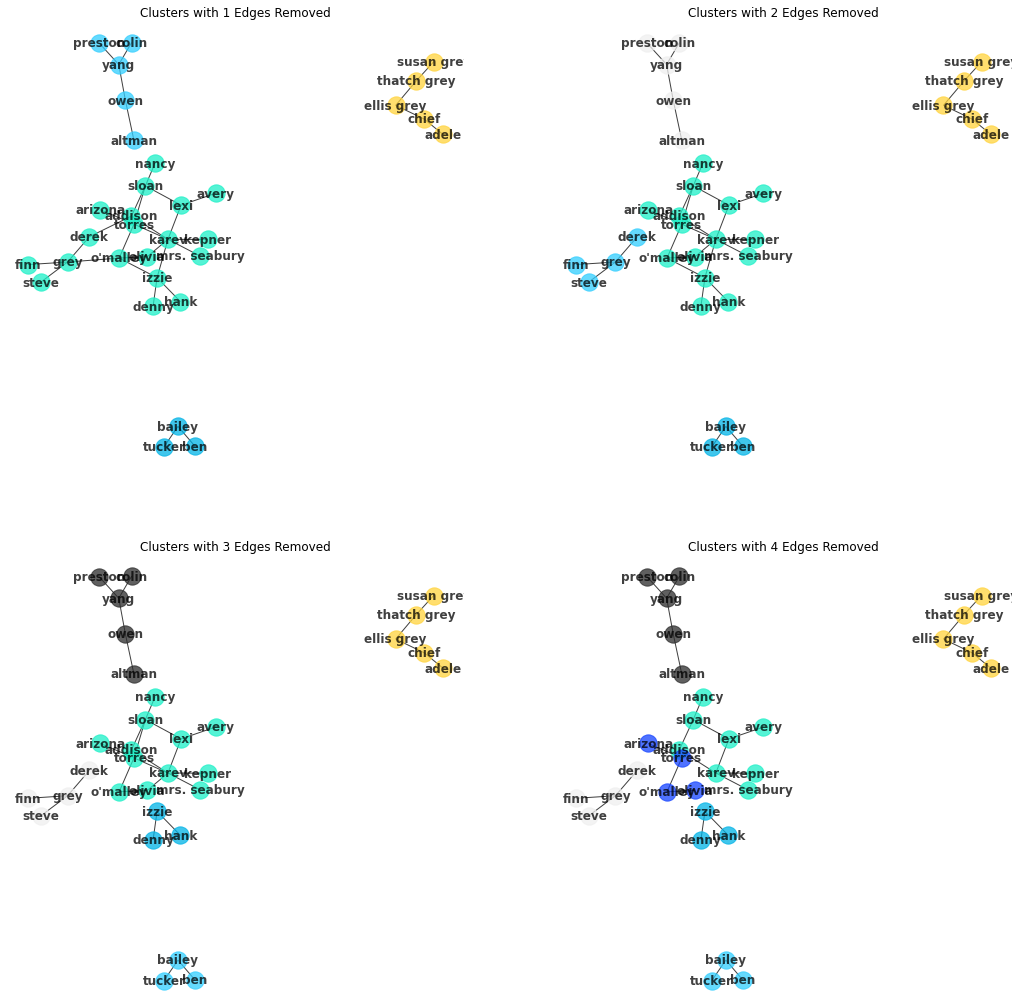

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18,18))
for n, cs in enumerate(c_gn[:4]):
    i = n//2
    j = n%2
    ax = axes[i][j]
    ax.set_title('Clusters with {} Edges Removed'.format(n+1))
    #Multiple Clusters per Groups
    for n2, c in enumerate(cs):
        ci = G.subgraph(c)
        color = colors[n2][1]
        nx.draw(ci, with_labels=True, node_color=color, ax=ax,
                alpha=.75, font_weight='bold', pos=nx.spring_layout(G, seed=4));

And of course if you look at the last set, all of the nodes should be individually displayed, since all of the edges have been removed:

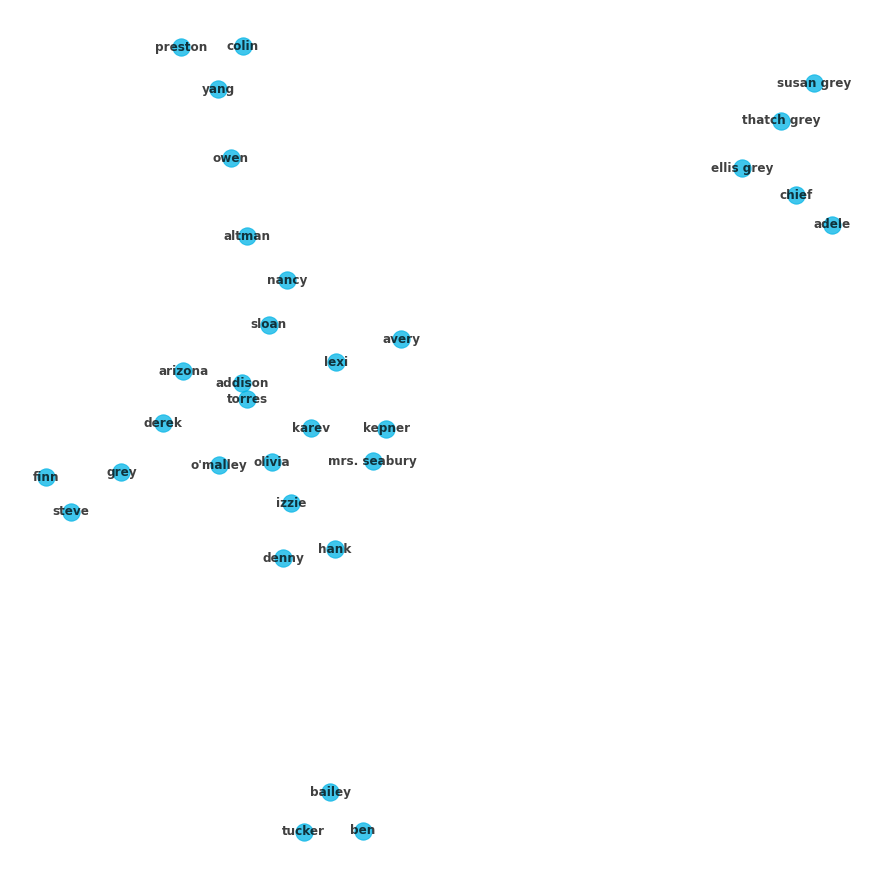

In [9]:
cs = c_gn[-1]
fig = plt.figure(figsize=(12,12))
for c in cs:
    ci = G.subgraph(c)
    nx.draw(ci, with_labels=True, node_color=color_dict['light-blue'],
                alpha=.75, font_weight='bold', pos=nx.spring_layout(G, seed=4));

## Additional Resources

To see the specific NetworkX documentation regarding the K-clique and Girman-Newman algorithms demonstrated in this lesson see the links below.

* [K-Clique Clustering Documentation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.community.kclique.k_clique_communities.html)
* [Girman-Newman Documentation](https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.community.centrality.girvan_newman.html)

## Summary

In this lesson, you explored two algorithmic approaches to clustering networks. Such methods are essential for dissecting large networks into small constituencies for deeper analysis and comparison. From here, you'll further practice clustering with an applied analysis to a social network.